<h1> Dataset 1: <strong> Colombian Politics </strong> </h1>

Este dataset realiza un etiquetado de tweets en español respecto a su polaridad. El etiquetado se da de 3 modos: neutral, positivo, negativo.

<h2> Diccionario de datos </h2>

<table>
<thead>
  <tr>
    <th>Variable</th>
    <th>Definition</th>
    <th>Example</th>
  </tr>
</thead>
<tbody>
  <tr>
      <td><b>Tweet ID</b></td>
    <td></td>
    <td>142389495503925248</td>
  </tr>
  <tr>
    <td><b>User</b></td>
    <td>Twitter user</td>
    <td>ccifuentes</td>
  </tr>
  <tr>
    <td><b>Content</b></td>
    <td>Tweet content</td>
    <td>Salgo de #VeoTV , que día más largoooooo...</td>
  </tr>
  <tr>
    <td><b>Sentiment Value</b></td>
    <td>Tweet sentiment:NEU, P, N, NONE</td>
    <td>NONE</td>
  </tr>
  <tr>
    <td><b>Sentiment Type</b></td>
    <td>Type of sentiment:AGREEMENT, DISAGREEMENT</td>
    <td>AGREEMENT</td>
  </tr>
    <tr>
    <td><b>Topic</b></td>
    <td></td>
    <td>otros</td>
  </tr>
</tbody>
</table>

In [1]:
import os
import black
import jupyter_black
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import xml.etree.ElementTree as ET
import pandas as pd
import nltk
nltk.download("stopwords")
nltk.download("punkt")
jupyter_black.load(
    lab=False,
    line_length=80,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cacu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
DEBUG:jupyter_black:config: {'line_length': 80, 'target_versions': {<TargetVersion.PY310: 10>}}


In [2]:
# Specify the directory path where the XML file is located
directory_path = r"C:\Users\Cacu\Desktop\Universidad\Trabajo_Final\venv\env\project\trabajo-final-ucse\0_datasets\TASS_data\general_corpus_2012"

# Change the current working directory to the directory where the XML file is located
os.chdir(directory_path)

# Specify the XML file name
xml_file = "general-train-tagged-3l.xml"

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

# Continue with your XML processing

In [3]:
# Create empty lists to store the values
tweet_ids = []
users = []
contents = []
sentiments_values = []
sentiments_types = []
topics = []

# Iterate over the "tweet" elements and extract the values
for tweet in root.iter("tweet"):
    tweet_id = tweet.find("tweetid").text
    user = tweet.find("user").text
    content = tweet.find("content").text

    sentiment = tweet.find("sentiments/polarity")
    sentiment_value = (
        sentiment.find("value").text if sentiment is not None else None
    )
    sentiment_type = (
        sentiment.find("type").text if sentiment is not None else None
    )

    topic = tweet.find("topics/topic").text

    tweet_ids.append(tweet_id)
    users.append(user)
    contents.append(content)
    sentiments_values.append(sentiment_value)
    sentiments_types.append(sentiment_type)
    topics.append(topic)

# Create a dataframe from the extracted values
df = pd.DataFrame(
    {
        "tweet_id": tweet_ids,
        "user": users,
        "tweet": contents,
        "sentiment_value": sentiments_values,
        "sentiment_type": sentiments_types,
        "topic": topics,
    }
)

# Display the dataframe
df

df_05_wordcloud = df

## EDA

In [4]:
# check for NaN on tweet_id
df["tweet_id"].isnull().sum()

0

In [5]:
# check for NaN
df.isnull().sum().sum()

1

In [6]:
# Pre process removing stopwords\
df_01_wordsfreq = df
stop_words = set(stopwords.words("spanish"))
stop_words.update("q", "d")
# convert the column to string type
df_01_wordsfreq["tweet"] = df_01_wordsfreq["tweet"].astype(str)
df_01_wordsfreq["tweet"] = df_01_wordsfreq["tweet"].apply(
    lambda x: " ".join(
        [
            word.lower()
            for word in x.split()
            if word.lower() not in stop_words
            and word.lower()
            and word.isalpha()
        ]
    )
)

In [7]:
df_01_wordsfreq["tweet"] = df_01_wordsfreq["tweet"].apply(
    lambda x: nltk.word_tokenize(x)
)

word_list = [word for words in df_01_wordsfreq["tweet"] for word in words]

word_freq = Counter(word_list)

top_words = word_freq.most_common(20)

<BarContainer object of 10 artists>

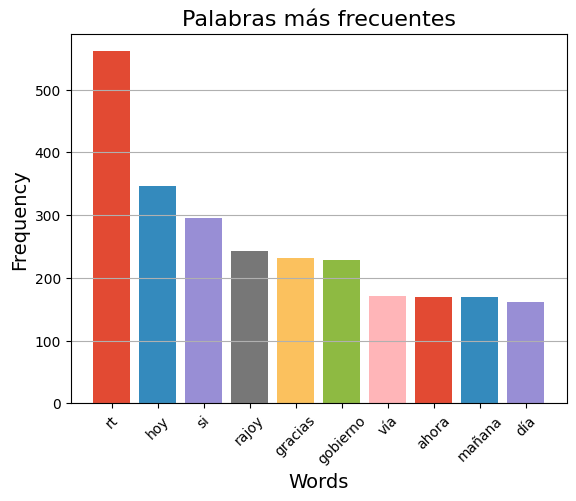

In [8]:
# Get the top 10 most common words
top_words = dict(word_freq.most_common(10))
# Create a bar chart of the top 10 most common words
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Palabras más frecuentes", fontsize=16)
style.use("ggplot")
plt.bar(
    list(top_words.keys()), list(top_words.values()), color=sns.color_palette()
)

In [9]:
df_02_topics = df.groupby("topic").size()
df_03_sentiment_value = df.groupby("sentiment_value").size()
df_04_sentiment_type = df.groupby("sentiment_type").size()

In [10]:
df_02_topics = df_02_topics.reset_index(name="count")
df_03_sentiment_value = df_03_sentiment_value.reset_index(name="count")
df_04_sentiment_type = df_04_sentiment_type.reset_index(name="count")

<AxesSubplot: xlabel='topic', ylabel='count'>

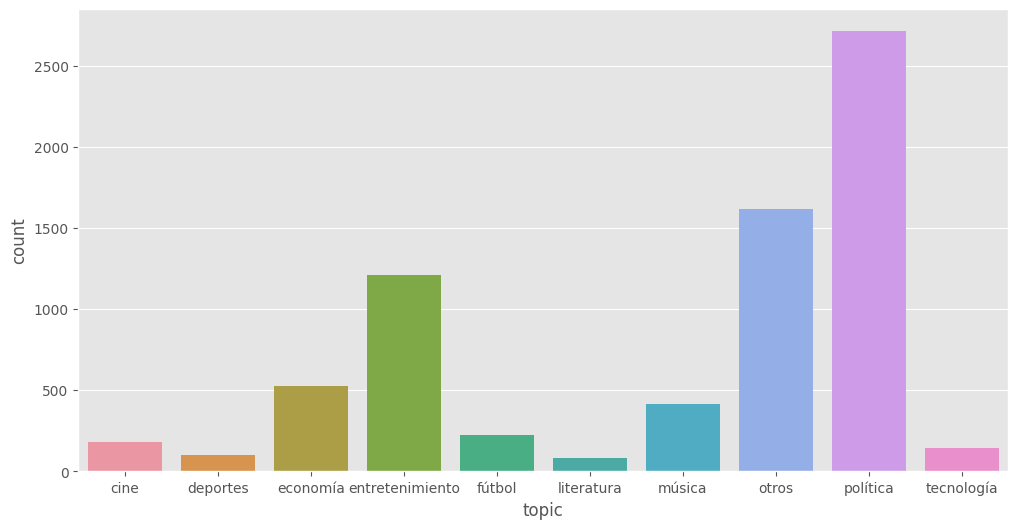

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x="topic", y="count", data=df_02_topics)

<AxesSubplot: xlabel='sentiment_value', ylabel='count'>

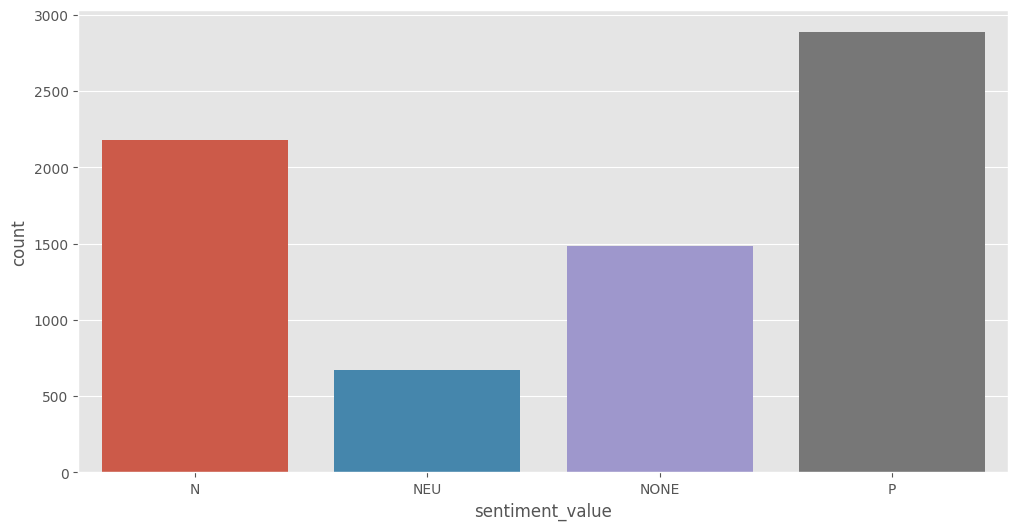

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x="sentiment_value", y="count", data=df_03_sentiment_value)

<AxesSubplot: xlabel='sentiment_type', ylabel='count'>

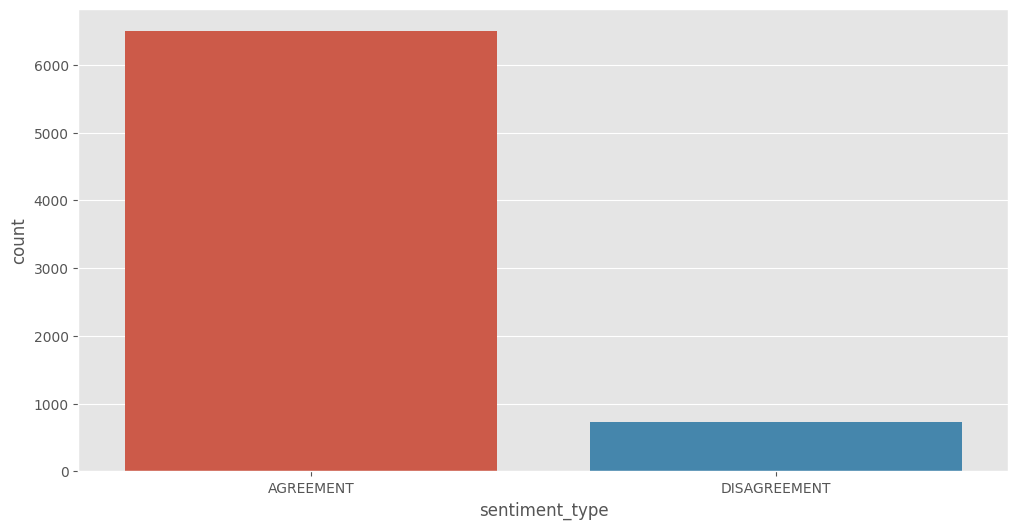

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x="sentiment_type", y="count", data=df_04_sentiment_type)

In [14]:
df

,tweet_id,user,tweet,sentiment_value,sentiment_type,topic
0,142389495503925248,ccifuentes,"[salgo, día]",NONE,AGREEMENT,otros
1,142389933619945473,CarmendelRiego,"[libraras, ayudar, besos, gracias]",NEU,DISAGREEMENT,otros
2,142391947707940864,CarmendelRiego,"[gracias, mar]",P,AGREEMENT,otros
3,142416095012339712,mgilguerrero,"[off, pensando, regalito, va, sgae, van, inten...",N,AGREEMENT,política
4,142422495721562112,paurubio,"[conozco, alguien, adicto, ja, ja, ja, suena]",P,AGREEMENT,otros
...,...,...,...,...,...,...
7214,189809904935120896,mariviromero,"[indignante, si, repara, ello, hoy, aqui, grac...",N,AGREEMENT,entretenimiento
7215,189814854503235584,mariviromero,"[pobres, discriminar, mujer]",N,AGREEMENT,otros
7216,189815389021143041,mariviromero,"[crean, banco, productos, mujeres, cáncer, mama]",P,AGREEMENT,tecnología
7217,189824278827507712,Tonicanto1,"[sorprendente, huída, hoy, senado, rajoy]",N,AGREEMENT,política


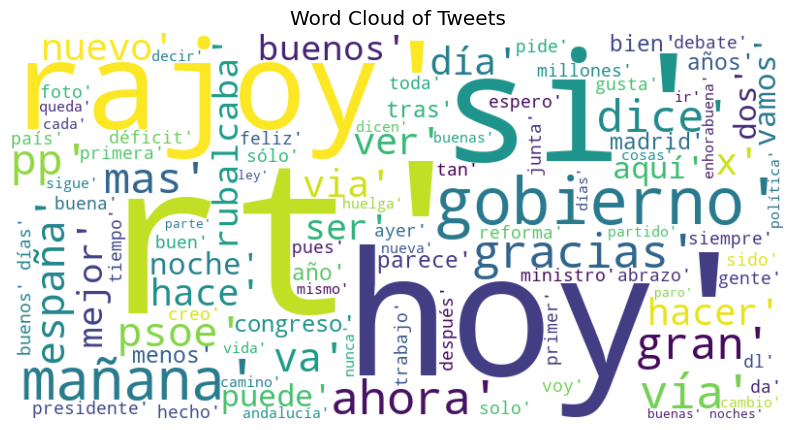

In [16]:
# Concatenate all tweets into a single string
TEXT = " ".join(df["tweet"].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color="white",
    stopwords=stop_words,
).generate(TEXT)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()